In [5]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

path ='s3_files/paris' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    df['date'] = file_
    list_.append(df)
frame = pd.concat(list_)

In [6]:
frame.head()

,accommodates,bathrooms,bedrooms,borough,city,country,date,host_id,last_modified,latitude,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,32318670,2016-05-28 15:02:36.461396,48.890179,...,14.0,NaN,Epinettes,NaN,183.0,NaN,0,11387548,Entire home/apt,NaN
1,6,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,15373479,2016-05-28 15:01:08.142988,48.884428,...,4.0,NaN,Clignancourt,4.5,201.0,NaN,7,3016646,Entire home/apt,NaN
2,5,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,17234626,2016-05-28 14:59:53.744825,48.872106,...,2.0,NaN,Porte-Saint-Martin,NaN,138.0,NaN,0,9192873,Entire home/apt,NaN
3,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,16964249,2016-05-28 14:59:35.280944,48.845801,...,3.0,NaN,Grenelle,NaN,92.0,NaN,2,7111862,Entire home/apt,NaN
4,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,10229835,2016-05-28 14:52:35.797141,48.870084,...,5.0,NaN,Porte-Saint-Martin,5.0,109.0,NaN,23,1982586,Entire home/apt,NaN


In [7]:
frame.info()
paris = frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629621 entries, 0 to 70157
Data columns (total 22 columns):
accommodates            629621 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
date                    629621 non-null object
host_id                 629621 non-null int64
last_modified           629621 non-null object
latitude                629621 non-null float64
location                262698 non-null object
longitude               629621 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629621 non-null object
overall_satisfaction    543234 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629621 non-null int64
room_i

In [8]:
# i am going to drop null values for accommodates 
paris = paris[np.isfinite(paris['accommodates'])]
paris = paris[np.isfinite(paris['price'])]

paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629611 entries, 0 to 70157
Data columns (total 22 columns):
accommodates            629611 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
date                    629611 non-null object
host_id                 629611 non-null int64
last_modified           629611 non-null object
latitude                629611 non-null float64
location                262698 non-null object
longitude               629611 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629611 non-null object
overall_satisfaction    543230 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629611 non-null int64
room_i

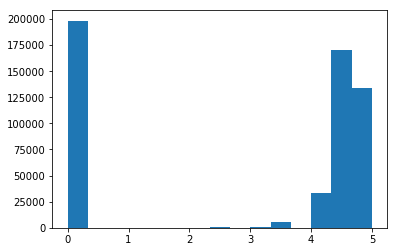

In [9]:
# i may impute overall satisfaction using the mean. first, i'll check out the distribution
rating_vals = paris[np.isfinite(paris['overall_satisfaction'])]
plt.hist(rating_vals.overall_satisfaction, bins=15)
plt.show()

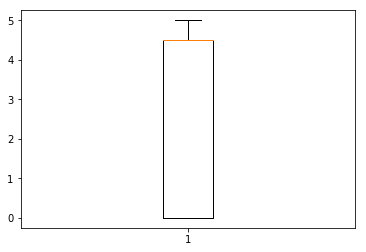

In [10]:
plt.boxplot(rating_vals.overall_satisfaction)
plt.show()

In [11]:
paris[paris['overall_satisfaction'] < 1]

,accommodates,bathrooms,bedrooms,borough,city,country,date,host_id,last_modified,latitude,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,15669323,2017-01-03 17:52:52.270369,48.890375,...,NaN,NaN,Clignancourt,0.0,92.0,NaN,0,6057158,Shared room,NaN
1,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,106863421,2017-01-03 17:52:52.268115,48.886701,...,NaN,NaN,Grandes-Carrières,0.0,92.0,NaN,0,16326530,Shared room,NaN
2,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,95001052,2017-01-03 17:52:52.265788,48.842081,...,NaN,NaN,Auteuil,0.0,93.0,NaN,1,15535840,Shared room,NaN
3,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,22530701,2017-01-03 17:52:50.752525,48.852422,...,NaN,NaN,Charonne,0.0,65.0,NaN,0,11771527,Shared room,NaN
5,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,26095542,2017-01-03 17:52:50.745691,48.861540,...,NaN,NaN,Roquette,0.0,70.0,NaN,0,5515531,Shared room,NaN
6,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,20548553,2017-01-03 17:52:48.467473,48.847386,...,NaN,NaN,Quinze-Vingts,0.0,65.0,NaN,0,16173285,Shared room,NaN
7,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,26617709,2017-01-03 17:52:48.463249,48.866520,...,NaN,NaN,Folie-Méricourt,0.0,70.0,NaN,2,5148247,Shared room,NaN
8,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,2893280,2017-01-03 17:52:48.460854,48.891803,...,NaN,NaN,Grandes-Carrières,0.0,76.0,NaN,0,4692372,Shared room,NaN
9,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,35866668,2017-01-03 17:52:48.458013,48.885582,...,NaN,NaN,Plaine-Monceau,0.0,75.0,NaN,0,9300900,Shared room,NaN
10,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,13689310,2017-01-03 17:52:48.455633,48.883500,...,NaN,NaN,Saint-Vincent-de-Paul,0.0,65.0,NaN,1,7178563,Shared room,NaN


In [12]:
# most with a rating of 0 have no reviews
paris[paris['overall_satisfaction'].isnull()]

,accommodates,bathrooms,bedrooms,borough,city,country,date,host_id,last_modified,latitude,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,32318670,2016-05-28 15:02:36.461396,48.890179,...,14.0,NaN,Epinettes,NaN,183.0,NaN,0,11387548,Entire home/apt,NaN
2,5,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,17234626,2016-05-28 14:59:53.744825,48.872106,...,2.0,NaN,Porte-Saint-Martin,NaN,138.0,NaN,0,9192873,Entire home/apt,NaN
3,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,16964249,2016-05-28 14:59:35.280944,48.845801,...,3.0,NaN,Grenelle,NaN,92.0,NaN,2,7111862,Entire home/apt,NaN
7,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,9886443,2016-05-28 14:45:29.701270,48.868062,...,2.0,NaN,Arts-et-Metiers,NaN,69.0,NaN,1,8577332,Private room,NaN
8,3,NaN,0.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,34996605,2016-05-28 14:41:39.421269,48.882026,...,5.0,NaN,Saint-Georges,NaN,91.0,NaN,2,6839481,Entire home/apt,NaN
10,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,33357223,2016-05-28 14:39:51.393281,48.886987,...,1.0,NaN,Goutte-dOr,NaN,69.0,NaN,0,11249047,Entire home/apt,NaN
12,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,7504411,2016-05-28 14:39:24.741264,48.866780,...,3.0,NaN,Folie-Méricourt,NaN,69.0,NaN,0,7363128,Entire home/apt,NaN
14,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,34764075,2016-05-28 14:37:34.457347,48.824788,...,3.0,NaN,Petit-Montrouge,NaN,58.0,NaN,1,7294846,Private room,NaN
15,1,NaN,0.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,7929416,2016-05-28 14:37:13.127480,48.890531,...,1.0,NaN,Grandes-Carrières,NaN,12.0,NaN,1,7297279,Entire home/apt,NaN
16,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,18241302,2016-05-28 14:36:03.643704,48.869367,...,1.0,NaN,Porte-Saint-Martin,NaN,69.0,NaN,0,3620806,Private room,NaN


In [13]:
# all rentals with 0 reviews have either a null rating or a rating of 0 
zero = paris[paris['reviews'] == 0]
zero.describe()

,accommodates,bathrooms,bedrooms,borough,country,host_id,latitude,longitude,minstay,overall_satisfaction,price,reviews,room_id,survey_id
count,172850.000000,0.0,172734.000000,0.0,0.0,1.728500e+05,172850.000000,172850.000000,35993.000000,119402.0,172850.000000,172850.0,1.728500e+05,70467.000000
mean,3.064432,NaN,1.107460,NaN,NaN,3.406647e+07,48.864330,2.343282,3.018615,0.0,121.008267,0.0,1.091089e+07,1270.016703
std,1.466659,NaN,0.835733,NaN,NaN,3.220763e+07,0.019150,0.035618,2.881955,0.0,160.002763,0.0,5.195136e+06,161.175788
min,1.000000,NaN,0.000000,NaN,NaN,2.626000e+03,48.816114,2.230293,1.000000,0.0,9.000000,0.0,3.109000e+03,1077.000000
25%,2.000000,NaN,1.000000,NaN,NaN,8.975188e+06,48.849907,2.319574,1.000000,0.0,64.000000,0.0,6.897198e+06,1146.000000
50%,2.000000,NaN,1.000000,NaN,NaN,2.371700e+07,48.865521,2.346254,2.000000,0.0,88.000000,0.0,1.179418e+07,1350.000000
75%,4.000000,NaN,1.000000,NaN,NaN,4.842834e+07,48.880840,2.371144,4.000000,0.0,131.000000,0.0,1.486241e+07,1478.000000
max,16.000000,NaN,10.000000,NaN,NaN,1.432046e+08,48.901698,2.468284,30.000000,0.0,10865.000000,0.0,2.014408e+07,1478.000000


In [14]:
# to get rid of some null values, replace all overall satisfaction #s with 0 if there are 0 reviews
paris.loc[paris['reviews'] == 0, 'overall_satisfaction'] = 0


In [15]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629611 entries, 0 to 70157
Data columns (total 22 columns):
accommodates            629611 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
date                    629611 non-null object
host_id                 629611 non-null int64
last_modified           629611 non-null object
latitude                629611 non-null float64
location                262698 non-null object
longitude               629611 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629611 non-null object
overall_satisfaction    596678 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629611 non-null int64
room_i

Since there is such a big split in the data between 0's for ratings and ratings between 4 and 5, I don't feel comfortable imputing the rest of the rating data. There is still a ton of data to work with, so I will eliminate the remaining null values. 

In [16]:
paris = paris[np.isfinite(paris['overall_satisfaction'])]


In [17]:
# convert last updated to datetime object, drop columns I don't care about
paris['last_modified'] = pd.to_datetime(paris['last_modified'])

paris = paris.drop(['bathrooms', 'city', 'borough', 'latitude', 'country', 'location', 'longitude', 'name', 'property_type', 
                   'survey_id'], axis=1)


In [18]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596678 entries, 0 to 70157
Data columns (total 12 columns):
accommodates            596678 non-null int64
bedrooms                596281 non-null float64
date                    596678 non-null object
host_id                 596678 non-null int64
last_modified           596678 non-null datetime64[ns]
minstay                 93925 non-null float64
neighborhood            596678 non-null object
overall_satisfaction    596678 non-null float64
price                   596678 non-null float64
reviews                 596678 non-null int64
room_id                 596678 non-null int64
room_type               596678 non-null object
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 59.2+ MB


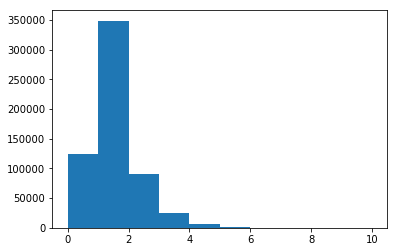

In [19]:
# i will assume if a minstay isn't included, it is 1 
paris['minstay'].fillna(1, inplace=True)

bedroom_vals = paris[np.isfinite(paris['bedrooms'])]
plt.hist(bedroom_vals.bedrooms)
plt.show()

# i feel good about imputing the mean value for missing bedrooms
paris['bedrooms'].fillna(int(paris['bedrooms'].mean()), inplace=True)


In [20]:
paris['bedrooms_per_person'] = paris['bedrooms'] / paris['accommodates']

paris[paris['accommodates'] == 0]

paris.info()

paris.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596678 entries, 0 to 70157
Data columns (total 13 columns):
accommodates            596678 non-null int64
bedrooms                596678 non-null float64
date                    596678 non-null object
host_id                 596678 non-null int64
last_modified           596678 non-null datetime64[ns]
minstay                 596678 non-null float64
neighborhood            596678 non-null object
overall_satisfaction    596678 non-null float64
price                   596678 non-null float64
reviews                 596678 non-null int64
room_id                 596678 non-null int64
room_type               596678 non-null object
bedrooms_per_person     596678 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(3)
memory usage: 63.7+ MB


,accommodates,bedrooms,host_id,minstay,overall_satisfaction,price,reviews,room_id,bedrooms_per_person
count,596678.000000,596678.000000,5.966780e+05,596678.000000,596678.000000,596678.000000,596678.000000,5.966780e+05,596678.000000
mean,3.085552,1.067019,2.835253e+07,1.284731,2.670718,109.254365,14.083454,8.893860e+06,0.352387
std,1.500853,0.812218,2.897899e+07,1.460815,2.299306,119.728935,28.421108,5.430761e+06,0.239643
min,1.000000,0.000000,1.415000e+03,1.000000,0.000000,8.000000,0.000000,2.525000e+03,0.000000
25%,2.000000,1.000000,6.855991e+06,1.000000,0.000000,60.000000,0.000000,4.217281e+06,0.250000
50%,2.000000,1.000000,1.770822e+07,1.000000,4.500000,83.000000,4.000000,8.452109e+06,0.400000
75%,4.000000,1.000000,3.935284e+07,1.000000,4.500000,121.000000,14.000000,1.354392e+07,0.500000
max,16.000000,10.000000,1.432046e+08,695.000000,5.000000,11323.000000,529.000000,2.014408e+07,6.000000


I want to look at the change in reviews over time. I will examine the number of reviews from the May 26, 2016 to July 25, 2017. 

In [21]:
paris.date.unique()

array(['s3_files/paris/tomslee_airbnb_paris_0435_2016-05-26.csv',
       's3_files/paris/tomslee_airbnb_paris_0515_2016-08-10.csv',
       's3_files/paris/tomslee_airbnb_paris_0762_2017-01-01.csv',
       's3_files/paris/tomslee_airbnb_paris_0809_2017-01-19.csv',
       's3_files/paris/tomslee_airbnb_paris_0892_2017-02-18.csv',
       's3_files/paris/tomslee_airbnb_paris_1000_2017-03-28.csv',
       's3_files/paris/tomslee_airbnb_paris_1077_2017-04-16.csv',
       's3_files/paris/tomslee_airbnb_paris_1146_2017-04-25.csv',
       's3_files/paris/tomslee_airbnb_paris_1350_2017-06-16.csv',
       's3_files/paris/tomslee_airbnb_paris_1478_2017-07-25.csv'], dtype=object)

In [22]:
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0435_2016-05-26.csv', 'date'] = '2016-05-26'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0515_2016-08-10.csv', 'date'] = '2016-08-10'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0762_2017-01-01.csv', 'date'] = '2017-01-01'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0809_2017-01-19.csv', 'date'] = '2017-01-19'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0892_2017-02-18.csv', 'date'] = '2017-02-18'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1000_2017-03-28.csv', 'date'] = '2017-03-28'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1077_2017-04-16.csv', 'date'] = '2017-04-16'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1146_2017-04-25.csv', 'date'] = '2017-04-25'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1350_2017-06-16.csv', 'date'] = '2017-06-16'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1478_2017-07-25.csv', 'date'] = '2017-07-25'



In [23]:

paris['date_time'] = pd.to_datetime(paris['date'])

In [24]:
rentals = paris.pivot(index='room_id', columns='date_time', values='reviews')

I am only interested in looking at rentals that have been on AirBnb for every data scrape; if rentals go on and off the site then we can't account for the time that they've been offline. 

In [25]:
rentals = rentals.dropna()

In [26]:
pct_change = pd.DataFrame()

In [27]:
# calculate compound monthly growth rate 

pct_change['diff'] = (rentals['2017-07-25 00:00:00'] / rentals['2016-05-26 00:00:00'])

In [28]:

pct_change['compound_monthly_growth'] = np.power(pct_change['diff'], 1/14) - 1 
pct_change['room_id'] = rentals.index.values



In [29]:
paris_may = pd.read_csv('s3_files/paris/tomslee_airbnb_paris_0435_2016-05-26.csv')
paris_jul = pd.read_csv('s3_files/paris/tomslee_airbnb_paris_1478_2017-07-25.csv')

In [30]:
# merge cmgr info with rental description info. 

paris_may.info()
paris_may['bedrooms_per_person'] = paris_may['bedrooms'] / paris_may['accommodates']
paris_jul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55951 entries, 0 to 55950
Data columns (total 14 columns):
room_id                 55951 non-null int64
host_id                 55951 non-null int64
room_type               55951 non-null object
borough                 0 non-null float64
neighborhood            55951 non-null object
reviews                 55951 non-null int64
overall_satisfaction    28182 non-null float64
accommodates            55951 non-null int64
bedrooms                55701 non-null float64
price                   55951 non-null float64
minstay                 54559 non-null float64
latitude                55951 non-null float64
longitude               55951 non-null float64
last_modified           55951 non-null object
dtypes: float64(7), int64(4), object(3)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70158 entries, 0 to 70157
Data columns (total 21 columns):
room_id                 70158 non-null int64
survey_id               70158 no

In [31]:
paris_may = paris_may.drop(['borough', 'overall_satisfaction', 'price', 'minstay'], axis=1)
paris_jul = paris_jul[['room_id', 'price', 'reviews']]

In [32]:
paris_may = paris_may[np.isfinite(paris_may['bedrooms'])]
paris_may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55701 entries, 0 to 55950
Data columns (total 11 columns):
room_id                55701 non-null int64
host_id                55701 non-null int64
room_type              55701 non-null object
neighborhood           55701 non-null object
reviews                55701 non-null int64
accommodates           55701 non-null int64
bedrooms               55701 non-null float64
latitude               55701 non-null float64
longitude              55701 non-null float64
last_modified          55701 non-null object
bedrooms_per_person    55701 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 5.1+ MB


In [33]:
paris_growth = paris_may.merge(pct_change)
paris_growth = paris_growth.merge(paris_jul, on='room_id')


In [34]:
neighborhoods = pd.read_csv('paris_quartier.csv')
neighborhoods = neighborhoods[['L_QU', 'C_AR']]
neighborhoods.columns = ['neighborhood', 'arrondissement']
paris_growth =  paris_growth.merge(neighborhoods)


In [35]:
paris_growth = paris_growth[['room_type', 'reviews_x', 'reviews_y', 'accommodates', 'bedrooms', 'arrondissement', 
                             'diff', 'compound_monthly_growth', 'price', 'bedrooms_per_person']]

paris_growth['rev_change'] = paris_growth['reviews_y'] - paris_growth['reviews_x']

In [36]:
paris_growth['log_price'] = np.log10(paris_growth.price)

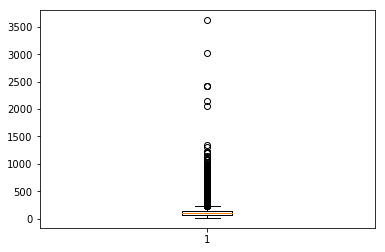

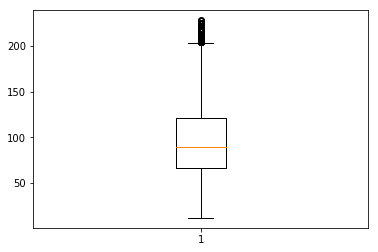

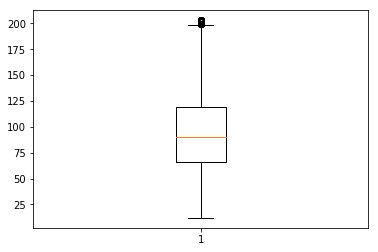

In [37]:
# examine paris growth dataframe 

plt.boxplot(paris_growth.price)
plt.show()

# let's remove outliers - just interested in 'typical rentals'
iqr = np.percentile(paris_growth.price, 75) - np.percentile(paris_growth.price, 25)
threshold = 1.5*iqr + np.percentile(paris_growth.price, 75)
paris_growth = paris_growth[paris_growth['price'] < threshold]


plt.boxplot(paris_growth.price)
plt.show()


iqr = np.percentile(paris_growth.price, 75) - np.percentile(paris_growth.price, 25)
threshold = 1.5*iqr + np.percentile(paris_growth.price, 75)
paris_growth = paris_growth[paris_growth['price'] < threshold]

plt.boxplot(paris_growth.price)
plt.show()

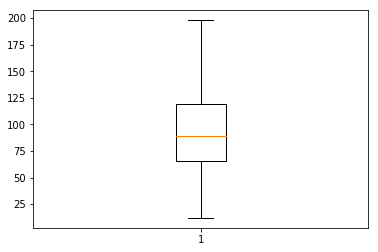

In [38]:
iqr = np.percentile(paris_growth.price, 75) - np.percentile(paris_growth.price, 25)
threshold = 1.5*iqr + np.percentile(paris_growth.price, 75)
paris_growth = paris_growth[paris_growth['price'] < threshold]

plt.boxplot(paris_growth.price)
plt.show()

In [117]:
# look for outliers in 'accommodates'
paris_growth = paris_growth[paris_growth.accommodates < 7]


In [118]:
# examine rentals with a change in number of reviews over time. 

nc = paris_growth[paris_growth['rev_change'] == 0]
change = paris_growth[paris_growth['rev_change'] > 0]

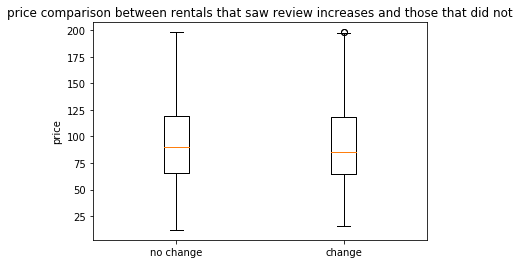

In [119]:
plt.boxplot([nc.price, change.price])
plt.xticks([1,2], ['no change', 'change'])
plt.ylabel('price')
plt.title('price comparison between rentals that saw review increases and those that did not')
plt.show()

In [120]:
# i am going to compare many different linear models 
# i am going to build a function to expedite this process

import statsmodels.api as sm
from statsmodels.formula.api import ols

# build a linear model to compare prices of rentals that saw a change in reviews vs those that did not 
def linear_model(df1, df2):
    # linear model 1 
    X_sm = df1[['room_type', 'accommodates', 'bedrooms', 'arrondissement']]
    X_sm = pd.get_dummies(X_sm, columns =['room_type', 'arrondissement'])
    X_sm = X_sm.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)
    X_sm = sm.add_constant(X_sm)
    y_sm = df1['price']
    lm_sm = sm.OLS(y_sm, X_sm).fit()

    
    # linear model 2 
    X_lg = df2[['room_type','accommodates', 'bedrooms', 'arrondissement']]
    X_lg = pd.get_dummies(X_lg, columns =['room_type', 'arrondissement'])
    X_lg = X_lg.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)
    X_lg = sm.add_constant(X_lg)
    y_lg = df2['price']
    lm_lg = sm.OLS(y_lg, X_lg).fit()
    
    print(lm_sm.summary())
    print(lm_lg.summary())
    
    return [X_sm, lm_sm, X_lg, lm_lg]
    
    

In [121]:
X_nc, lm_nc, X_c, lm_c = linear_model(nc, change)



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:37:46   Log-Likelihood:                -33171.
No. Observations:                6907   AIC:                         6.639e+04
Df Residuals:                    6883   BIC:                         6.655e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     43

In [122]:
# create a function that will calculate z-score
def z_score(B1, B2, se1, se2):
    numerator = B1 - B2
    inner_denom = np.abs(np.power(se1,2) - np.power(se2, 2))
    denominator = np.power(inner_denom, 0.5)
    zscore = numerator / denominator
    return zscore


# create a funciton that will compare all coefficients 
def compare_coefficients(X1, lm1, X2, lm2):
    coef_sm = []
    for i in lm1.params:
        coef_sm.append(i)

    se_sm = []
    for i in lm1.bse:
        se_sm.append(i)
    
       
    sm_df = pd.DataFrame()
    sm_df['variable'] = X1.columns
    sm_df['coef_sm'] = coef_sm

    sm_df['se_sm'] = se_sm


    coef_lg = []
    for i in lm2.params:
        coef_lg.append(i)

    se_lg = []
    for i in lm2.bse:
        se_lg.append(i)
    
       
    lg_df = pd.DataFrame()
    lg_df['variable'] = X2.columns
    lg_df['coef_lg'] = coef_lg
    lg_df['se_lg'] = se_lg



    df = sm_df.merge(lg_df)
    df['z_score'] = z_score(df.coef_sm, df.coef_lg, df.se_sm, df.se_lg)
    return df   
    

In [123]:
c_nc_df = compare_coefficients(X_nc, lm_nc, X_c, lm_c)

In [124]:
# compare cofficients - rentals that had a change in their number of reviews vs those that did not
c_nc_df

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,43.965264,1.615573,30.473914,1.283694,13.753768
1,accommodates,7.743736,0.405113,8.429838,0.268836,-2.263933
2,bedrooms,16.588116,0.663985,18.972250,0.471982,-5.104978
3,room_type_Private room,-22.409081,1.140139,-23.300499,0.851717,1.176084
4,room_type_Shared room,-20.804911,4.776225,-47.089656,3.034855,7.126934
5,arrondissement_1,50.036814,3.637163,44.981623,1.913441,1.634307
6,arrondissement_2,33.553084,2.914749,33.638105,1.614338,-0.035033
7,arrondissement_3,39.592087,2.650934,38.883494,1.487161,0.322896
8,arrondissement_4,39.527933,3.059488,44.746966,1.538513,-1.973533
9,arrondissement_5,28.785504,2.662130,34.566580,1.607321,-2.724180


In [125]:
def split_data(df, column, threshold):
    df1 = df[df[column] <= threshold]
    df2 = df[df[column] >= threshold]
    return df1, df2 

pct_50, pct_50plus = split_data(paris_growth, 'rev_change', np.percentile(paris_growth.rev_change, 50))
X_50, lm_50, X_50p, lm_50p = linear_model(pct_50,pct_50plus)




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     270.3
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:37:59   Log-Likelihood:                -46203.
No. Observations:                9626   AIC:                         9.245e+04
Df Residuals:                    9602   BIC:                         9.263e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     40

In [126]:
ab_50_df = compare_coefficients(X_50, lm_50, X_50p, lm_50p)
ab_50_df

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,40.023679,1.371736,30.825993,1.423197,24.252279
1,accommodates,8.015593,0.340560,8.430948,0.288737,-2.300009
2,bedrooms,17.218409,0.562622,18.753084,0.512817,-6.631112
3,room_type_Private room,-22.396518,0.981833,-23.055443,0.921411,1.943086
4,room_type_Shared room,-24.563456,4.282004,-46.971504,3.148089,7.719988
5,arrondissement_1,51.054881,3.033471,43.781009,2.019867,3.213975
6,arrondissement_2,34.698330,2.380593,32.765914,1.729932,1.181612
7,arrondissement_3,41.376216,2.065732,37.455661,1.617414,3.051022
8,arrondissement_4,40.735858,2.362026,44.584294,1.660170,-2.290491
9,arrondissement_5,32.983097,2.169157,32.837870,1.734989,0.111546


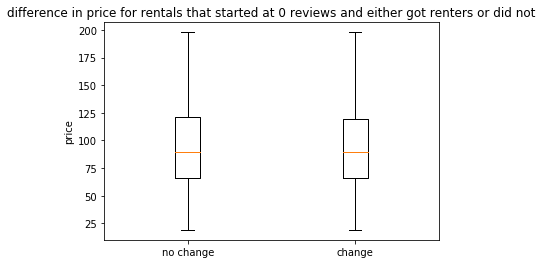

In [129]:
# before looking at compound monthly growth rate, first look at rentals that started with 0 reviews and didn't change
# compare with those that started at 0 and ended up with rentals 

norev_start = paris_growth[paris_growth['reviews_x'] == 0]

nc_0, c_0 = split_data(norev_start, 'rev_change', 0)

plt.boxplot([nc_0.price, c_0.price])
plt.xticks([1,2], ['no change', 'change'])
plt.ylabel('price')
plt.title('difference in price for rentals that started at 0 reviews and either got renters or did not')
plt.show()


In [130]:
# compare linear model

X_nc, lm_nc, X_c, lm_c = linear_model(nc_0,c_0)
cnc_df = compare_coefficients(X_nc, lm_nc, X_c, lm_c)
cnc_df

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     116.6
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:38:01   Log-Likelihood:                -24404.
No. Observations:                5069   AIC:                         4.886e+04
Df Residuals:                    5045   BIC:                         4.901e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     46

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,46.144545,1.878565,44.164206,1.714522,2.579452
1,accommodates,7.884734,0.481351,7.823007,0.428987,0.282721
2,bedrooms,15.579031,0.774027,16.148192,0.695449,-1.674959
3,room_type_Private room,-20.396575,1.342341,-20.768283,1.222930,0.671603
4,room_type_Shared room,-19.331032,5.047767,-24.082072,4.544467,2.162298
5,arrondissement_1,46.685633,4.469926,40.923968,3.761523,2.385996
6,arrondissement_2,34.537976,3.602076,35.436584,2.999787,-0.450645
7,arrondissement_3,37.182384,3.157174,35.545284,2.595897,0.911039
8,arrondissement_4,38.514804,3.677586,39.360035,3.072910,-0.418356
9,arrondissement_5,29.380183,3.288683,27.779392,2.730262,0.873160


Looks like the vast majority of rentals that started with 0 reviews ended up with 0 reviews. 

In [135]:
# paris_growth = paris_growth[paris_growth['compound_monthly_growth'] >= 0]
paris_growth

,room_type,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
0,Entire home/apt,0,0,4,2.0,17,NaN,NaN,194.0,0.500000,0,2.287802,NaN,0.000000
1,Entire home/apt,0,0,2,0.0,17,NaN,NaN,78.0,0.000000,0,1.892095,NaN,0.000000
2,Entire home/apt,40,90,6,2.0,17,2.250000,0.059634,78.0,0.333333,50,1.892095,5.963402,3.571429
3,Entire home/apt,33,46,4,2.0,17,1.393939,0.024007,144.0,0.500000,13,2.158362,2.400749,0.928571
4,Entire home/apt,0,0,2,1.0,17,NaN,NaN,59.0,0.500000,0,1.770852,NaN,0.000000
6,Private room,4,5,2,1.0,17,1.250000,0.016067,36.0,0.500000,1,1.556303,1.606653,0.071429
7,Entire home/apt,3,3,4,1.0,17,1.000000,0.000000,82.0,0.250000,0,1.913814,0.000000,0.000000
8,Entire home/apt,0,0,4,2.0,17,NaN,NaN,96.0,0.500000,0,1.982271,NaN,0.000000
9,Entire home/apt,7,18,2,1.0,17,2.571429,0.069789,84.0,0.500000,11,1.924279,6.978912,0.785714
10,Entire home/apt,0,0,4,1.0,17,NaN,NaN,84.0,0.250000,0,1.924279,NaN,0.000000


In [136]:
paris_growth['cmg_pct'] = paris_growth['compound_monthly_growth'] * 100

/Users/sarahjordan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
# look at all the data 

paris = paris_growth[paris_growth.cmg_pct > 0]

paris_cmgr, paris_cmgr_hi = split_data(paris, 'cmg_pct', np.percentile(paris.cmg_pct, 50))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris_cmgr, paris_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:38:05   Log-Likelihood:                -29304.
No. Observations:                6166   AIC:                         5.866e+04
Df Residuals:                    6142   BIC:                         5.882e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     29

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,29.293336,1.806144,31.311133,1.808721,-20.906245
1,accommodates,8.938698,0.384675,8.081769,0.373972,9.509896
2,bedrooms,18.687807,0.691210,18.770168,0.645490,-0.333158
3,room_type_Private room,-22.359509,1.214335,-23.969918,1.188961,6.521394
4,room_type_Shared room,-39.160053,4.942156,-51.758729,3.776574,3.952092
5,arrondissement_1,45.358674,2.816119,44.670689,2.589056,0.621012
6,arrondissement_2,33.987023,2.332445,33.718773,2.223312,0.380435
7,arrondissement_3,41.720342,2.119101,36.320562,2.065206,11.370854
8,arrondissement_4,43.364192,2.194963,46.326389,2.140735,-6.109007
9,arrondissement_5,36.250805,2.272035,33.120756,2.248964,9.691691
